##### 라이브러리 정의

In [1]:
import urllib.parse

import pandas as pd

In [2]:
# !jupyter nbconvert --to script "03. Stock Price Info_MA_CandleChart".ipynb

##### 마켓타입 및 URL 정의

In [3]:
MARKET_CODE_DICT = {

    'kospi': 'stockMkt',

    'kosdaq': 'kosdaqMkt',

    'konex': 'konexMkt'

}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

##### 함수정의 1.[종목코드 6자리]

In [4]:
# 6자리 안되면 0으로 앞을 채워라.
def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6)

    return outValue

##### 함수정의 2.[파일 다운로드]

In [5]:
def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)    

    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
#     06d : 숫자가 없는 칸은 0으로 맞춰줌.
 
    return df

##### 종목코드 가져오기

In [6]:
stocks = get_stock_codes('kospi')

stocks

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,078930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"최익훈, 정익희, 김회언 (각자 대표이사)",http://www.hdc-dvp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
827,현대코퍼레이션,011760,상품 종합 도매업,"자동차,철강,기계,선박,플랜트,컴퓨터,전자제품 수출,수출입대행/자원(탄광,유전) 개발",1977-12-01,12월,"정몽혁, 김원갑, 장안석(각자대표이사)",http://www.hyundaicorp.co.kr,서울특별시
828,현대코퍼레이션홀딩스,227840,음·식료품 및 담배 도매업,"브랜드사업, 육류유통",2015-10-23,12월,"정몽혁, 김원갑(각자대표이사)",http://www.hyundaicorpholdings.com,서울특별시
829,화신,010690,자동차 신품 부품 제조업,"자동차엔진부품(ARM류,C/MBR류),자동차부품 제조",1994-01-14,12월,"정서진, 장의호",http://www.hwashin.co.kr,경상북도
830,효성첨단소재,298050,화학섬유 제조업,PET타이어코드,2018-07-13,12월,조용수,http://www.hyosungadvancedmaterials.com,서울특별시


매수 / 매도 결정 기본 예제 연습

In [7]:
stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)
# 내가 원하는 종목을 가져올 수 있다 ( 여기까지 했다면 )

AJ네트웍스
095570


# 

###  연습문제( 내가 원하는 회사명의 종목코드를 가져오기) ( 11:20 )

In [8]:
# 삼성전자에 해당하는 종목코드를 가져오기 
# 해당 조건식에 맞는 종목코드를 가져오기 

#### 가져올 회사 종목코드 - > 회사명 : 보험업 / 주요제품 : 손해보험 

In [9]:
stocks.dtypes

회사명     object
종목코드    object
업종      object
주요제품    object
상장일     object
결산월     object
대표자명    object
홈페이지    object
지역      object
dtype: object

In [10]:
seek1 = "보험업"
seek2 = "손해보험"

In [11]:
seekCom = stocks.loc[(stocks.업종.str.upper() == seek1) & (stocks.주요제품.str.upper() == seek2)]

In [12]:
seekCom

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
214,흥국화재,000540,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
614,한화손해보험,000370,보험업,손해보험,1975-06-30,12월,나채범,http://www.hwgeneralins.com/,서울특별시


In [13]:
targetColumn = ["종목코드"]

In [14]:
seekStockCode = seekCom.loc[: ,targetColumn]

In [15]:
seekStockCode

,종목코드
214,000540
614,000370


# 

In [16]:
# windosw 에 있는 폰트 가져오기 (폰트가 없으면 한글이 깨져나온다더니, 빨갛게...)

In [17]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from matplotlib import font_manager, rc
import platform

print(platform.system())

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    pass

Windows


In [18]:
end = date.today()
start = date.today() - timedelta(50) # datetime.datetime(2021,4,1) 

STOCK = web.DataReader(stock_code, start, end)
STOCK

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2023-04-24,4930,4930,4740,4775,131038,-0.021516
2023-04-25,4800,4895,4615,4720,155396,-0.011518
2023-04-26,4685,4855,4615,4770,109051,0.010593
2023-04-27,4750,4810,4680,4750,64374,-0.004193
2023-04-28,4730,4750,4700,4720,45216,-0.006316
2023-05-02,4780,4780,4710,4750,30349,0.006356
2023-05-03,4690,4750,4680,4690,40512,-0.012632
2023-05-04,4700,4700,4625,4665,81427,-0.005330
2023-05-08,4665,4685,4640,4655,35188,-0.002144


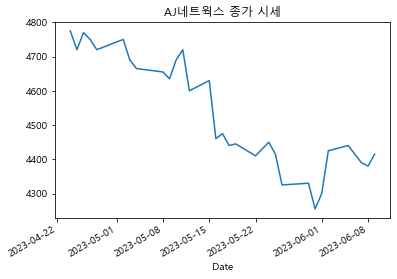

In [19]:
STOCK['Close'].plot()
# print(plt.style.available)
# plt.style.use(['fivethirtyeight'])
plt.title(stock_name+" 종가 시세")
plt.show()

In [20]:
STOCK["MA_5"]=STOCK["Close"].rolling(window=5, min_periods=1).mean() # min_periods=1
STOCK["MA_20"]=STOCK["Close"].rolling(window=20, min_periods=1).mean()
STOCK["diff"]=STOCK["MA_5"]-STOCK["MA_20"]
STOCK.tail()

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2023-06-02,4300,4425,4300,4425,174633,0.029070,4327.0,4487.75,-160.75
2023-06-05,4425,4475,4415,4440,75353,0.003390,4350.0,4476.50,-126.50
2023-06-07,4445,4465,4375,4390,66263,-0.011261,4362.0,4463.25,-101.25
2023-06-08,4345,4385,4325,4380,62426,-0.002278,4387.0,4450.50,-63.50
2023-06-09,4385,4420,4365,4415,61694,0.007991,4410.0,4436.75,-26.75


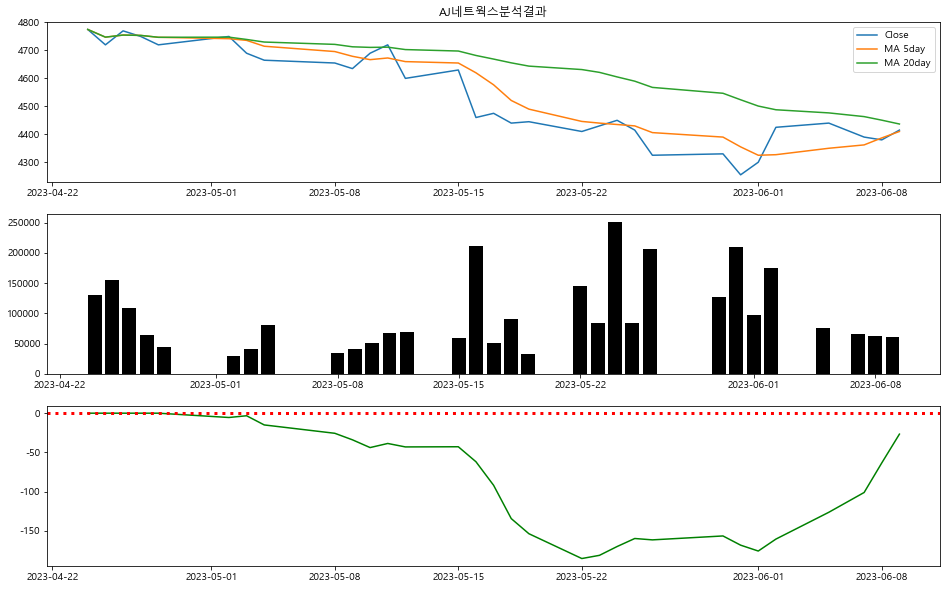

In [21]:

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(STOCK.index, STOCK['Close'], label = 'Close')
plt.plot(STOCK.index, STOCK['MA_5'], label='MA 5day')
plt.plot(STOCK.index, STOCK['MA_20'], label='MA 20day')
plt.title(stock_name+"분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(STOCK.index, STOCK['Volume'], color='black')

#  이동평균 차이 (diff)
plt.subplot(313)
plt.rc('axes', unicode_minus=False)
plt.plot(STOCK.index, STOCK['diff'].fillna(0), color='g')
plt.axhline(y=0, color='r',linestyle=':', linewidth=3) # https://financedata.github.io/posts/matplotlib_hline_and_vline.html